In [1]:
# Dependencies

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
# Files
trained_data = pd.read_csv('Resources/train.csv')
test_data = pd.read_csv('Resources/test.csv')

In [3]:
trained_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Making one big DF to preprocess
data = pd.concat([trained_data,test_data], axis=0)
y_train = trained_data['SalePrice']
data = data.drop(['Id', 'SalePrice'], axis=1)
print(data.shape)

(2919, 79)


In [6]:
selected_columns = [
    "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF",
    "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd",
    "GarageYrBlt", "GarageCars", "GarageArea","SalePrice"] 
#skipped all the categorical values, probably should keep those since this
#influences homesaleprice as shown in the top features
trained_data_corr = trained_data[selected_columns]
corr = trained_data_corr.corr()
highly_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

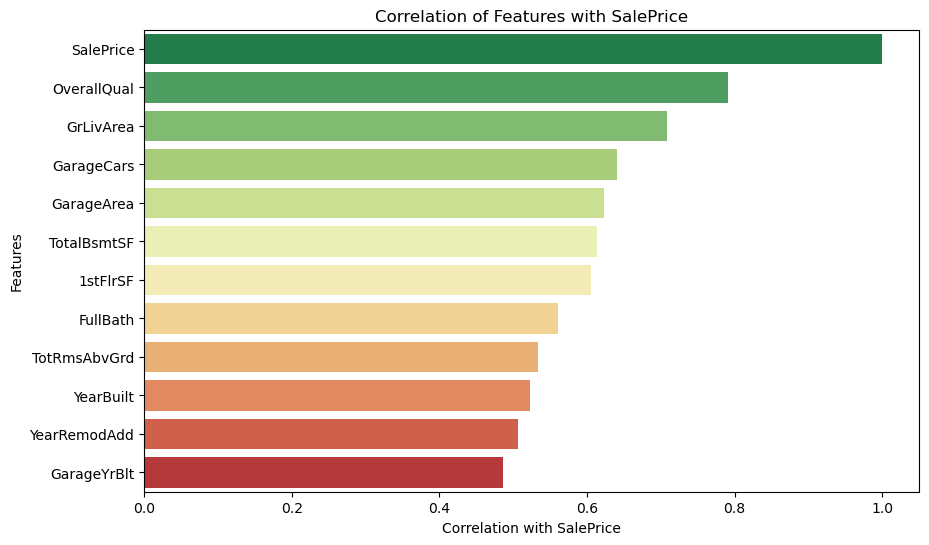

In [29]:
# Extract correlations of each feature with SalePrice
feature_correlations = corr.loc["SalePrice", selected_columns]
feature_correlations = feature_correlations.sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
inverted_palette = sns.color_palette("RdYlGn", len(feature_correlations))[::-1]
sns.barplot(x=feature_correlations.values, y=feature_correlations.index, palette=inverted_palette)

# Set labels and title
plt.xlabel("Correlation with SalePrice")
plt.ylabel("Features")
plt.title("Correlation of Features with SalePrice")

# Show the plot
plt.show()

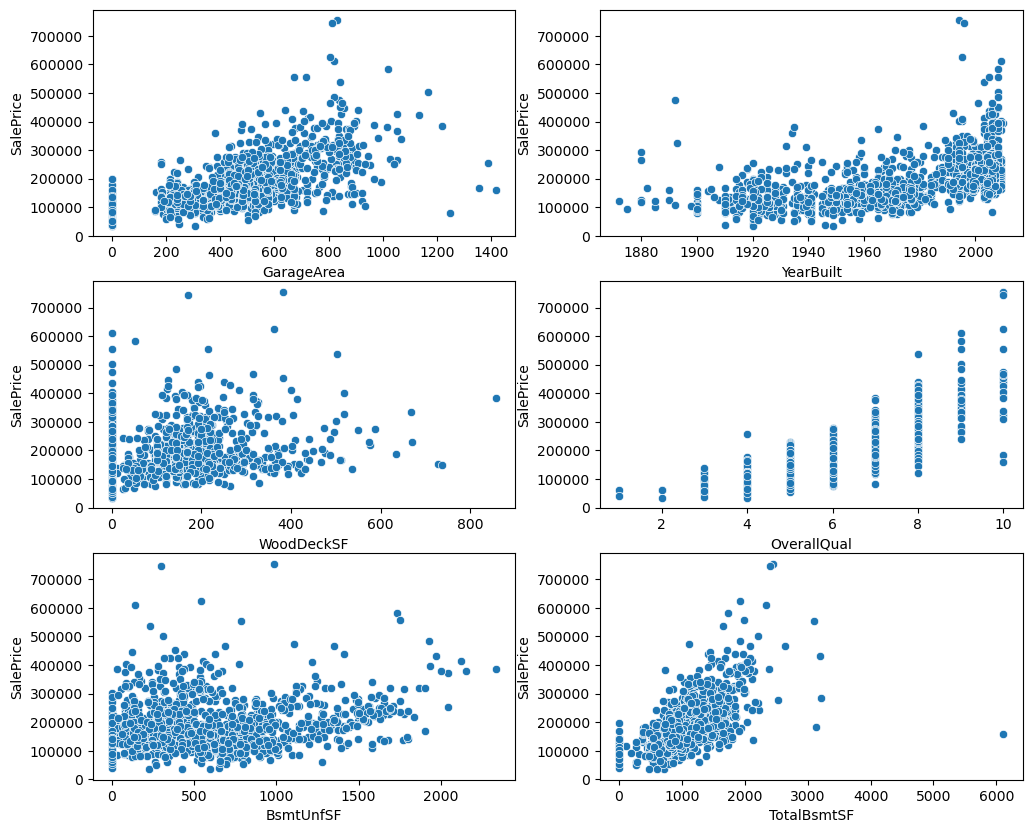

In [8]:
ig = plt.figure(figsize=(12,10))
#GarageArea
plt.subplot(321)
garage = sns.scatterplot(data=trained_data, x='GarageArea', y="SalePrice")
#YearBuilt
plt.subplot(322)
yearbuilt = sns.scatterplot(data=trained_data, x='YearBuilt', y="SalePrice")
#WoodDeckSF
plt.subplot(323)
wooddecksf = sns.scatterplot(data=trained_data, x='WoodDeckSF', y="SalePrice")
#OverallQual
plt.subplot(324)
overallqual = sns.scatterplot(data=trained_data, x='OverallQual', y="SalePrice")
#BsmtUnfSF
plt.subplot(325)
bsmtunfsf = sns.scatterplot(data=trained_data, x='BsmtUnfSF', y="SalePrice")
#TotalBsmtSF
plt.subplot(326)
totalbsmtsf = sns.scatterplot(data=trained_data, x='TotalBsmtSF', y="SalePrice")

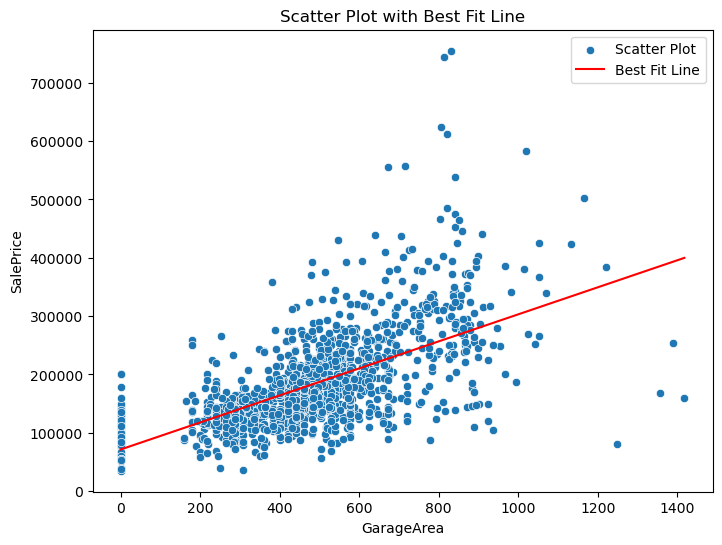

The score is 0.388666759031819.
The r2 is 0.388666759031819.
The mean squared error is 3855549505.982716.
The root mean squared error is 62093.07132025856.
The standard deviation is 79415.29188606751.


In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
garage = sns.scatterplot(data=trained_data, x='GarageArea', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
garageX = trained_data["GarageArea"].values.reshape(-1, 1)
garagey = trained_data["SalePrice"]
model = LinearRegression()
model.fit(garageX, garagey)
garagepredicted_y_values = model.predict(garageX)
garagepricespredicted = trained_data.copy()
garagepricespredicted["SalePrice_predicted"] = garagepredicted_y_values
garagebest_fit_line = sns.lineplot(data=garagepricespredicted, x="GarageArea", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("GarageArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
garagescore = model.score(garageX, garagey, sample_weight=None)
garager2 = r2_score(garagey, garagepredicted_y_values)
garagemse = mean_squared_error(garagey, garagepredicted_y_values)
garagermse = np.sqrt(garagemse)
garagestd = np.std(garagey)
print(f"The score is {garagescore}.")
print(f"The r2 is {garager2}.")
print(f"The mean squared error is {garagemse}.")
print(f"The root mean squared error is {garagermse}.")
print(f"The standard deviation is {garagestd}.")

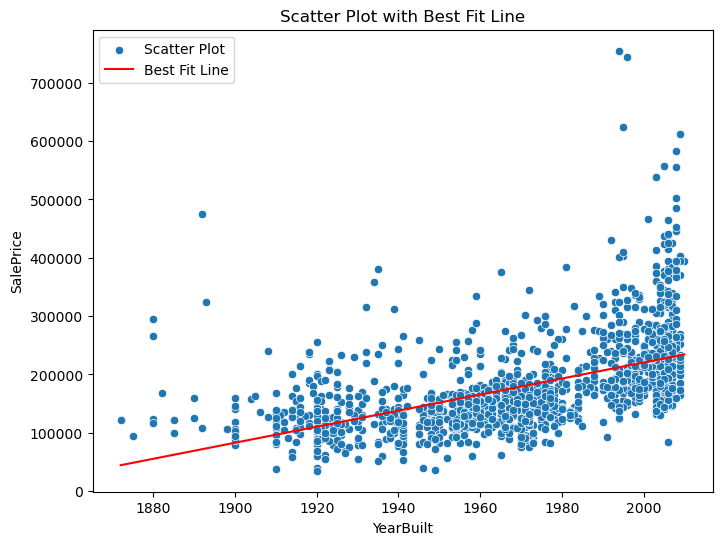

The score is 0.27342162073249154.
The r2 is 0.27342162073249154.
The mean squared error is 4582376228.725916.
The root mean squared error is 67693.25098357971.
The standard deviation is 79415.29188606751.


In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
yearbuilt = sns.scatterplot(data=trained_data, x='YearBuilt', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
yearbuiltX = trained_data["YearBuilt"].values.reshape(-1, 1)
yearbuilty = trained_data["SalePrice"]
model = LinearRegression()
model.fit(yearbuiltX, yearbuilty)
yearbuiltpredicted_y_values = model.predict(yearbuiltX)
yearbuiltpricespredicted = trained_data.copy()
yearbuiltpricespredicted["SalePrice_predicted"] = yearbuiltpredicted_y_values
yearbuiltbest_fit_line = sns.lineplot(data=yearbuiltpricespredicted, x="YearBuilt", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("YearBuilt")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
yearbuiltscore = model.score(yearbuiltX, yearbuilty, sample_weight=None)
yearbuiltr2 = r2_score(yearbuilty, yearbuiltpredicted_y_values)
yearbuiltmse = mean_squared_error(yearbuilty, yearbuiltpredicted_y_values)
yearbuiltrmse = np.sqrt(yearbuiltmse)
yearbuiltstd = np.std(yearbuilty)
print(f"The score is {yearbuiltscore}.")
print(f"The r2 is {yearbuiltr2}.")
print(f"The mean squared error is {yearbuiltmse}.")
print(f"The root mean squared error is {yearbuiltrmse}.")
print(f"The standard deviation is {yearbuiltstd}.")

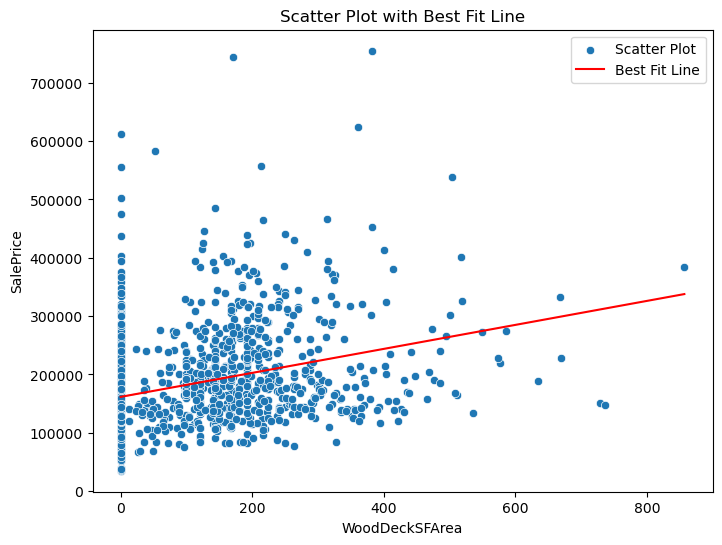

The score is 0.10524408301655919.
The r2 is 0.10524408301655919.
The mean squared error is 5643036403.904909.
The root mean squared error is 75120.14645822324.
The standard deviation is 79415.29188606751.


In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
WoodDeckSF = sns.scatterplot(data=trained_data, x='WoodDeckSF', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
WoodDeckSFX = trained_data["WoodDeckSF"].values.reshape(-1, 1)
WoodDeckSFy = trained_data["SalePrice"]
model = LinearRegression()
model.fit(WoodDeckSFX, WoodDeckSFy)
WoodDeckSFpredicted_y_values = model.predict(WoodDeckSFX)
WoodDeckSFpricespredicted = trained_data.copy()
WoodDeckSFpricespredicted["SalePrice_predicted"] = WoodDeckSFpredicted_y_values
WoodDeckSFbest_fit_line = sns.lineplot(data=WoodDeckSFpricespredicted, x="WoodDeckSF", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("WoodDeckSFArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
WoodDeckSFscore = model.score(WoodDeckSFX, WoodDeckSFy, sample_weight=None)
WoodDeckSFr2 = r2_score(WoodDeckSFy, WoodDeckSFpredicted_y_values)
WoodDeckSFmse = mean_squared_error(WoodDeckSFy, WoodDeckSFpredicted_y_values)
WoodDeckSFrmse = np.sqrt(WoodDeckSFmse)
WoodDeckSFstd = np.std(WoodDeckSFy)
print(f"The score is {WoodDeckSFscore}.")
print(f"The r2 is {WoodDeckSFr2}.")
print(f"The mean squared error is {WoodDeckSFmse}.")
print(f"The root mean squared error is {WoodDeckSFrmse}.")
print(f"The standard deviation is {WoodDeckSFstd}.")

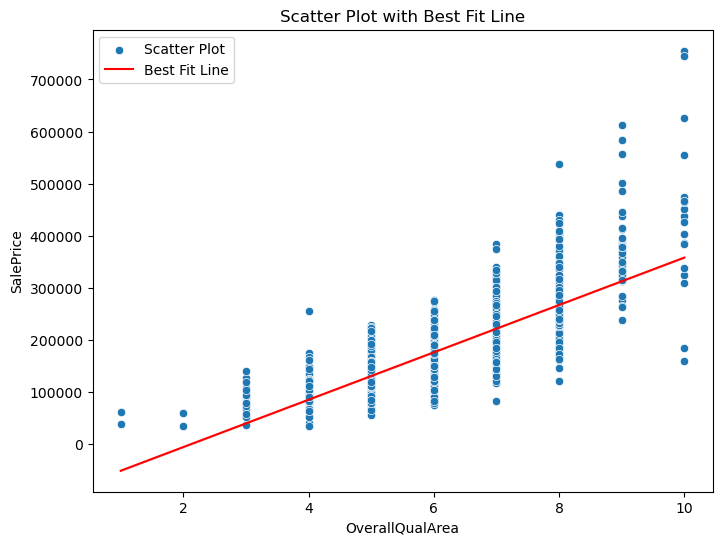

The score is 0.625651892462118.
The r2 is 0.625651892462118.
The mean squared error is 2360934371.5670257.
The root mean squared error is 48589.44712143806.
The standard deviation is 79415.29188606751.


In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
OverallQual = sns.scatterplot(data=trained_data, x='OverallQual', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
OverallQualX = trained_data["OverallQual"].values.reshape(-1, 1)
OverallQualy = trained_data["SalePrice"]
model = LinearRegression()
model.fit(OverallQualX, OverallQualy)
OverallQualpredicted_y_values = model.predict(OverallQualX)
OverallQualpricespredicted = trained_data.copy()
OverallQualpricespredicted["SalePrice_predicted"] = OverallQualpredicted_y_values
OverallQualbest_fit_line = sns.lineplot(data=OverallQualpricespredicted, x="OverallQual", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("OverallQualArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
OverallQualscore = model.score(OverallQualX, OverallQualy, sample_weight=None)
OverallQualr2 = r2_score(OverallQualy, OverallQualpredicted_y_values)
OverallQualmse = mean_squared_error(OverallQualy, OverallQualpredicted_y_values)
OverallQualrmse = np.sqrt(OverallQualmse)
OverallQualstd = np.std(OverallQualy)
print(f"The score is {OverallQualscore}.")
print(f"The r2 is {OverallQualr2}.")
print(f"The mean squared error is {OverallQualmse}.")
print(f"The root mean squared error is {OverallQualrmse}.")
print(f"The standard deviation is {OverallQualstd}.")

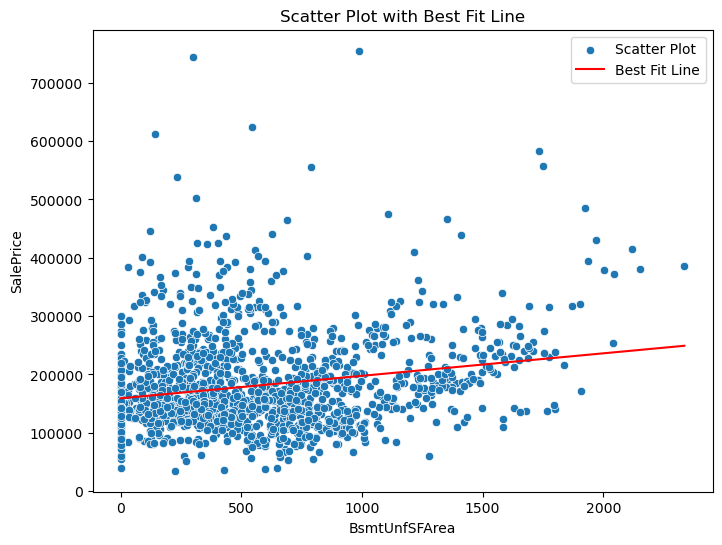

The score is 0.04600128671622783.
The r2 is 0.04600128671622783.
The mean squared error is 6016668195.376013.
The root mean squared error is 77567.18504223299.
The standard deviation is 79415.29188606751.


In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
BsmtUnfSF = sns.scatterplot(data=trained_data, x='BsmtUnfSF', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
BsmtUnfSFX = trained_data["BsmtUnfSF"].values.reshape(-1, 1)
BsmtUnfSFy = trained_data["SalePrice"]
model = LinearRegression()
model.fit(BsmtUnfSFX, BsmtUnfSFy)
BsmtUnfSFpredicted_y_values = model.predict(BsmtUnfSFX)
BsmtUnfSFpricespredicted = trained_data.copy()
BsmtUnfSFpricespredicted["SalePrice_predicted"] = BsmtUnfSFpredicted_y_values
BsmtUnfSFbest_fit_line = sns.lineplot(data=BsmtUnfSFpricespredicted, x="BsmtUnfSF", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("BsmtUnfSFArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
BsmtUnfSFscore = model.score(BsmtUnfSFX, BsmtUnfSFy, sample_weight=None)
BsmtUnfSFr2 = r2_score(BsmtUnfSFy, BsmtUnfSFpredicted_y_values)
BsmtUnfSFmse = mean_squared_error(BsmtUnfSFy, BsmtUnfSFpredicted_y_values)
BsmtUnfSFrmse = np.sqrt(BsmtUnfSFmse)
BsmtUnfSFstd = np.std(BsmtUnfSFy)
print(f"The score is {BsmtUnfSFscore}.")
print(f"The r2 is {BsmtUnfSFr2}.")
print(f"The mean squared error is {BsmtUnfSFmse}.")
print(f"The root mean squared error is {BsmtUnfSFrmse}.")
print(f"The standard deviation is {BsmtUnfSFstd}.")

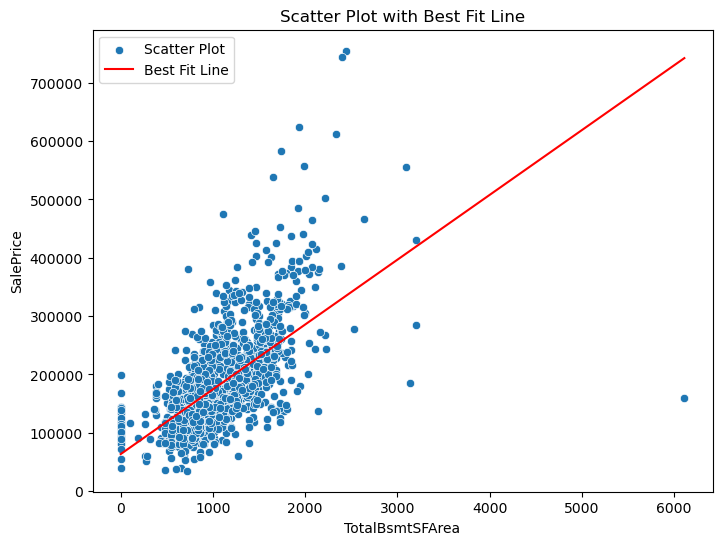

The score is 0.37648109325168655.
The r2 is 0.37648109325168655.
The mean squared error is 3932401923.829737.
The root mean squared error is 62708.8663892893.
The standard deviation is 79415.29188606751.


In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
TotalBsmtSF = sns.scatterplot(data=trained_data, x='TotalBsmtSF', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
TotalBsmtSFX = trained_data["TotalBsmtSF"].values.reshape(-1, 1)
TotalBsmtSFy = trained_data["SalePrice"]
model = LinearRegression()
model.fit(TotalBsmtSFX, TotalBsmtSFy)
TotalBsmtSFpredicted_y_values = model.predict(TotalBsmtSFX)
TotalBsmtSFpricespredicted = trained_data.copy()
TotalBsmtSFpricespredicted["SalePrice_predicted"] = TotalBsmtSFpredicted_y_values
TotalBsmtSFbest_fit_line = sns.lineplot(data=TotalBsmtSFpricespredicted, x="TotalBsmtSF", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("TotalBsmtSFArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
TotalBsmtSFscore = model.score(TotalBsmtSFX, TotalBsmtSFy, sample_weight=None)
TotalBsmtSFr2 = r2_score(TotalBsmtSFy, TotalBsmtSFpredicted_y_values)
TotalBsmtSFmse = mean_squared_error(TotalBsmtSFy, TotalBsmtSFpredicted_y_values)
TotalBsmtSFrmse = np.sqrt(TotalBsmtSFmse)
TotalBsmtSFstd = np.std(TotalBsmtSFy)
print(f"The score is {TotalBsmtSFscore}.")
print(f"The r2 is {TotalBsmtSFr2}.")
print(f"The mean squared error is {TotalBsmtSFmse}.")
print(f"The root mean squared error is {TotalBsmtSFrmse}.")
print(f"The standard deviation is {TotalBsmtSFstd}.")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

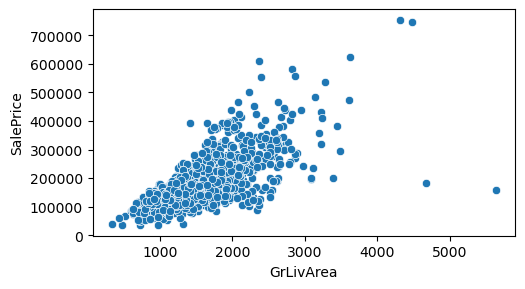

In [15]:
# GrLivArea vs SalePrice
ig = plt.figure(figsize=(12,10))
#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice")

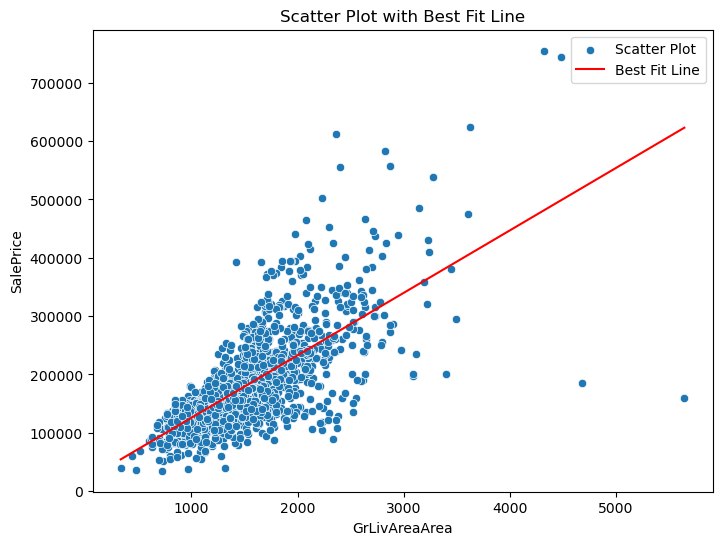

The score is 0.5021486502718042.
The r2 is 0.5021486502718042.
The mean squared error is 3139843209.6665273.
The root mean squared error is 56034.303865279944.
The standard deviation is 79415.29188606751.


In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
# Scatter plot
GrLivArea = sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice", ax=ax, label="Scatter Plot")

# Linear regression best-fit line
GrLivAreaX = trained_data["GrLivArea"].values.reshape(-1, 1)
GrLivAreay = trained_data["SalePrice"]
model = LinearRegression()
model.fit(GrLivAreaX, GrLivAreay)
GrLivAreapredicted_y_values = model.predict(GrLivAreaX)
GrLivAreapricespredicted = trained_data.copy()
GrLivAreapricespredicted["SalePrice_predicted"] = GrLivAreapredicted_y_values
GrLivAreabest_fit_line = sns.lineplot(data=GrLivAreapricespredicted, x="GrLivArea", y="SalePrice_predicted", color="red", ax=ax, label="Best Fit Line")

# Customize the plot as needed
ax.set_title("Scatter Plot with Best Fit Line")
ax.set_xlabel("GrLivAreaArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Show the plot
plt.show()
#Metrics
GrLivAreascore = model.score(GrLivAreaX, GrLivAreay, sample_weight=None)
GrLivArear2 = r2_score(GrLivAreay, GrLivAreapredicted_y_values)
GrLivAreamse = mean_squared_error(GrLivAreay, GrLivAreapredicted_y_values)
GrLivArearmse = np.sqrt(GrLivAreamse)
GrLivAreastd = np.std(GrLivAreay)
print(f"The score is {GrLivAreascore}.")
print(f"The r2 is {GrLivArear2}.")
print(f"The mean squared error is {GrLivAreamse}.")
print(f"The root mean squared error is {GrLivArearmse}.")
print(f"The standard deviation is {GrLivAreastd}.")

In [17]:
# OverallQual bins
bins = [0,3,7,10]
labels = ["low", "med", "high"]
sliced = pd.cut(trained_data['OverallQual'], bins, labels = labels, include_lowest = True)
sliced

0        med
1        med
2        med
3        med
4       high
        ... 
1455     med
1456     med
1457     med
1458     med
1459     med
Name: OverallQual, Length: 1460, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

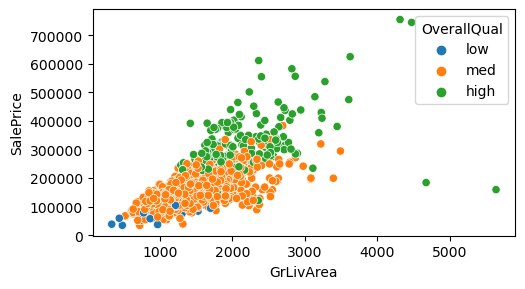

In [18]:
# GrLivArea vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12,10))
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice", hue=sliced)

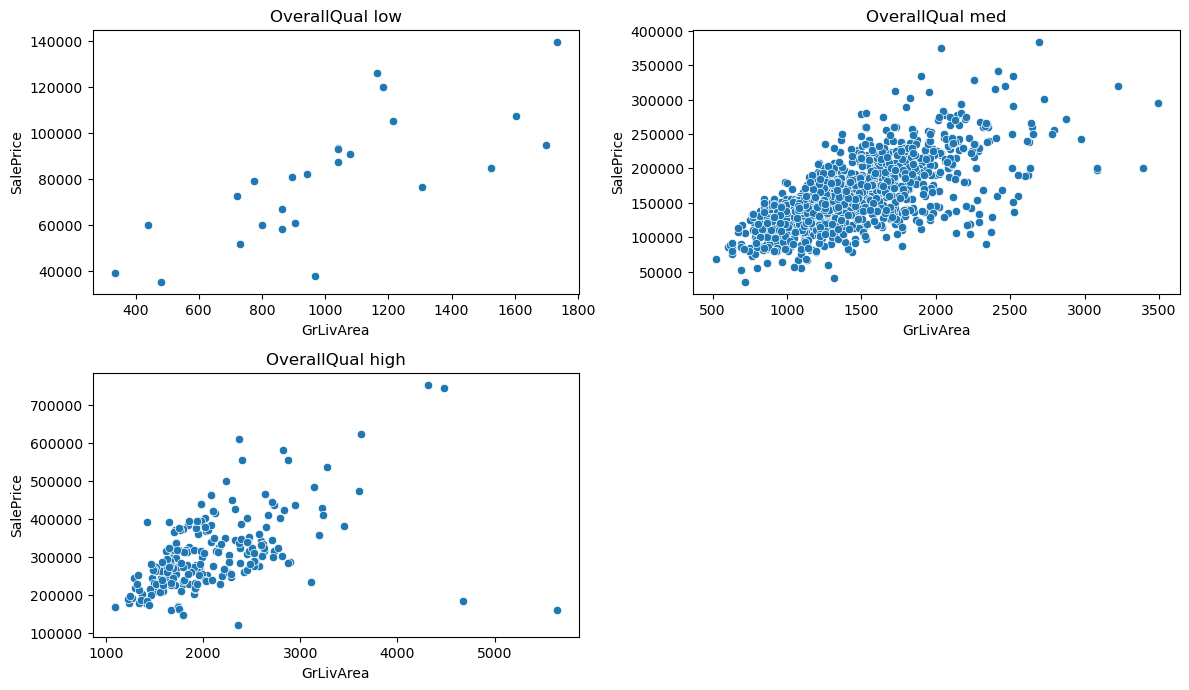

In [19]:
# GrLivArea vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12, 10))

# Create separate line graphs for each bin
for i, bin_label in enumerate(sliced.cat.categories):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows and columns as needed
    subset_data = trained_data[sliced == bin_label]
    sns.scatterplot(data=subset_data, x='GrLivArea', y="SalePrice")
    plt.title(f'OverallQual {bin_label}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

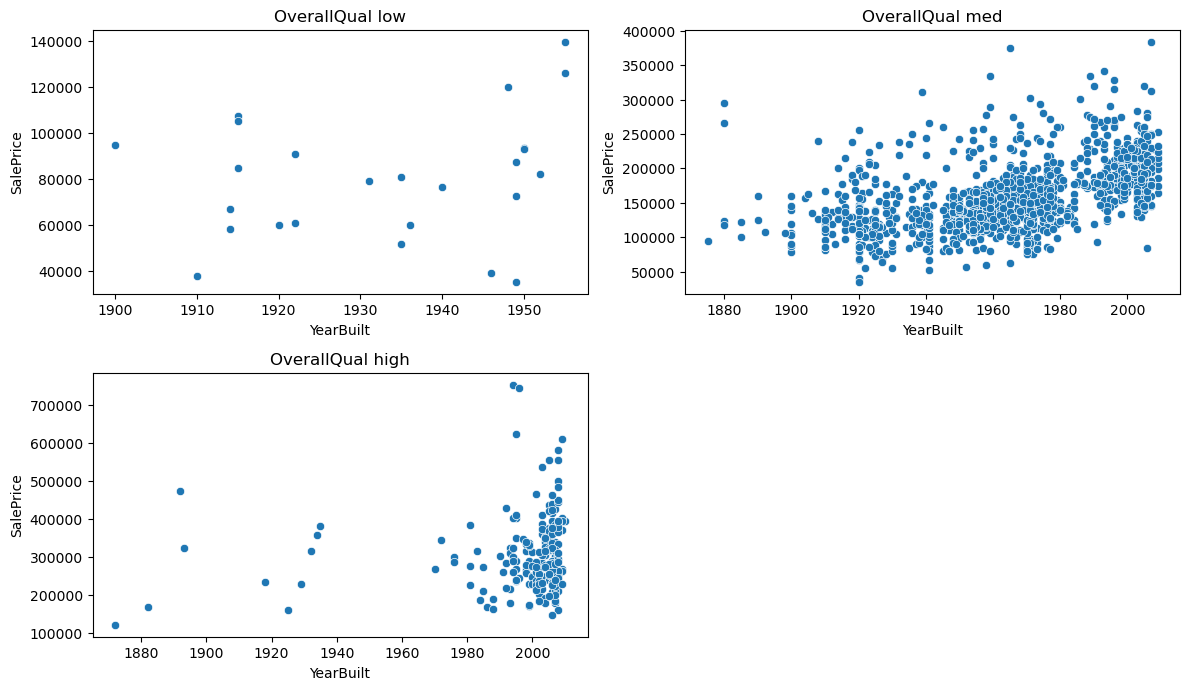

In [20]:
# YearBuilt vs SalePrice binned by OverallQual
ig = plt.figure(figsize=(12, 10))

# Create separate line graphs for each bin
for i, bin_label in enumerate(sliced.cat.categories):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows and columns as needed
    subset_data = trained_data[sliced == bin_label]
    sns.scatterplot(data=subset_data, x='YearBuilt', y="SalePrice")
    plt.title(f'OverallQual {bin_label}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
trained_data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [22]:
# Define the threshold for the minimum count
threshold = 60

# Get value counts of MSSubClass
value_counts = trained_data['MSSubClass'].value_counts()

# Create a dictionary to map values to categories
category_map = {}

# Iterate over the value counts
for value, count in value_counts.items():
    if count >= threshold:
        # Assign specific categories to values based on conditions
        if value == 20:
            category_map[value] = '1-STORY 1946 & NEWER ALL STYLES'
        elif value == 60:
            category_map[value] = '2-STORY 1946 & NEWER'
        elif value == 50:
            category_map[value] = '1-1/2 STORY FINISHED ALL AGES'
        elif value == 120:
            category_map[value] = '1-STORY PUD - 1946 & NEWER'
        elif value == 30:
            category_map[value] = '1-STORY 1945 & OLDER'
        elif value == 160:
            category_map[value] = '2-STORY PUD - 1946 & NEWER'
        elif value == 70:
            category_map[value] = '2-STORY 1945 & OLDER'
    else:
        category_map[value] = 'Other'

# Map the values to categories
trained_data['MSSubClass_binned'] = trained_data['MSSubClass'].map(category_map)

# Display the DataFrame
print(trained_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [23]:
# MSSubClass bins
MSSubClass_bins = [0,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClass_labels = ["1-STORY 1946 & NEWER ALL STYLES", "1-STORY 1945 & OLDER", "1-STORY W/FINISHED ATTIC ALL AGES",
          '1-1/2 STORY - UNFINISHED ALL AGES','1-1/2 STORY FINISHED ALL AGES','2-STORY 1946 & NEWER',
          '2-STORY 1945 & OLDER','2-1/2 STORY ALL AGES','SPLIT OR MULTI-LEVEL','SPLIT FOYER',
          'DUPLEX - ALL STYLES AND AGES','1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
          '1-1/2 STORY PUD - ALL AGES','2-STORY PUD - 1946 & NEWER','PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
          '2 FAMILY CONVERSION - ALL STYLES AND AGES']
subclass_sliced = pd.cut(trained_data['MSSubClass'], MSSubClass_bins, labels = MSSubClass_labels, include_lowest = True)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

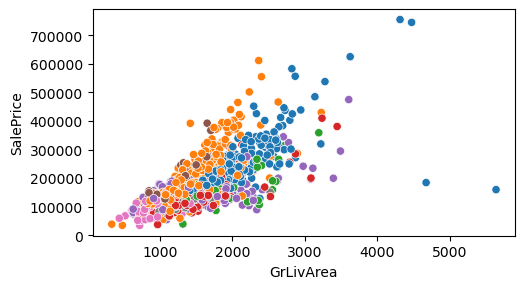

In [24]:
# GrLivArea vs SalePrice binned by MSSubClass
ig = plt.figure(figsize=(12,10))
plt.subplot(326)
sns.scatterplot(data=trained_data, x='GrLivArea', y="SalePrice", hue='MSSubClass_binned', legend=False)

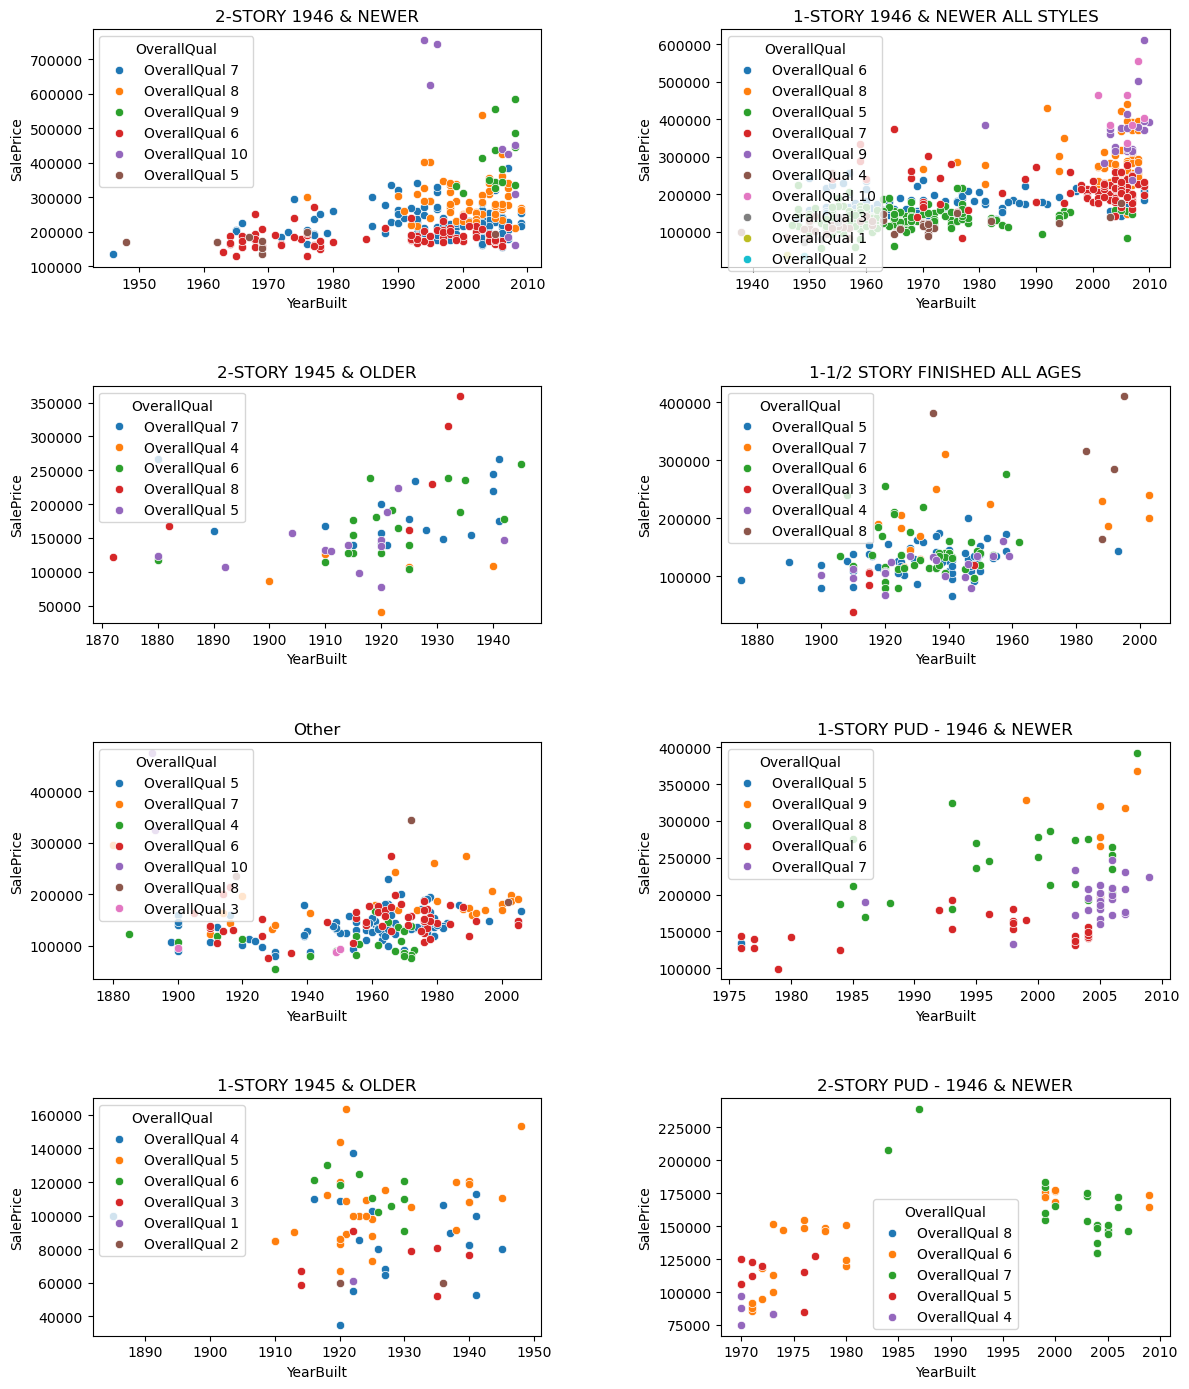

In [25]:
fig = plt.figure(figsize=(12, 14))  
rows, cols = 4, 2 
# Define the new bins based on MSSubClass_binned
MSSubClass_bins = trained_data['MSSubClass_binned'].unique()
# Create separate scatterplots for each bin in MSSubClass_binned
for i, bin_label in enumerate(MSSubClass_bins):
    plt.subplot(rows, cols, i + 1)
    subset_data = trained_data[trained_data['MSSubClass_binned'] == bin_label]
    for overall_qual in subset_data['OverallQual'].unique():
        subset_subset_data = subset_data[subset_data['OverallQual'] == overall_qual]
        sns.scatterplot(data=subset_subset_data, x='YearBuilt', y="SalePrice", label=f'OverallQual {overall_qual}')
    plt.title(f'{bin_label}')
    plt.legend(title='OverallQual')
# Adjust layout and add space between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)
# Show the plot
plt.show()

The score for 2-STORY 1946 & NEWER is 0.098.
The score for 1-STORY 1946 & NEWER ALL STYLES is 0.409.
The score for 2-STORY 1945 & OLDER is 0.125.
The score for 1-1/2 STORY FINISHED ALL AGES is 0.178.
The score for Other is 0.002.
The score for 1-STORY PUD - 1946 & NEWER is 0.138.
The score for 1-STORY 1945 & OLDER is 0.003.
The score for 2-STORY PUD - 1946 & NEWER is 0.453.


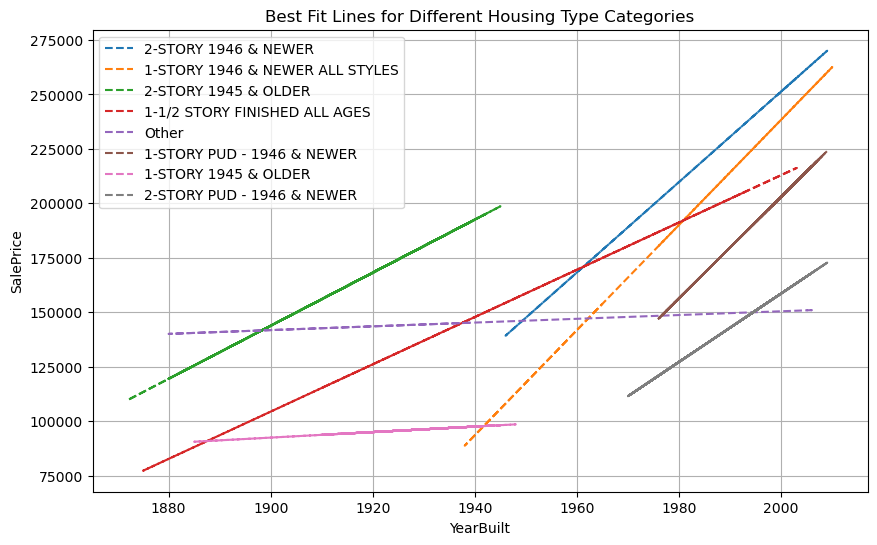

In [34]:
# Create a figure and define the number of rows and columns
fig, ax = plt.subplots(figsize=(10, 6))

# Define the new bins based on MSSubClass_binned
MSSubClass_bins = trained_data['MSSubClass_binned'].unique()

# Loop through each bin in MSSubClass_binned
for bin_label in MSSubClass_bins:
    subset_data = trained_data[trained_data['MSSubClass_binned'] == bin_label]

    # Prepare data for linear regression
    X = subset_data['YearBuilt'].values.reshape(-1, 1)
    y = subset_data['SalePrice']

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    predicted_y_values = model.predict(X)

    # Plot the best-fit line
    plt.plot(X.flatten(), predicted_y_values, label=f'{bin_label}', linestyle='--')
    binned_score = model.score(X, y, sample_weight=None)
    formatted_score = "{:.3f}".format(binned_score)
    print(f"The score for {bin_label} is {formatted_score}.")

plt.title('Best Fit Lines for Different Housing Type Categories')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The score for 2-STORY 1946 & NEWER is 0.496.
The score for 1-STORY 1946 & NEWER ALL STYLES is 0.643.
The score for 2-STORY 1945 & OLDER is 0.454.
The score for 1-1/2 STORY FINISHED ALL AGES is 0.638.
The score for Other is 0.339.
The score for 1-STORY PUD - 1946 & NEWER is 0.648.
The score for 1-STORY 1945 & OLDER is 0.213.
The score for 2-STORY PUD - 1946 & NEWER is 0.362.


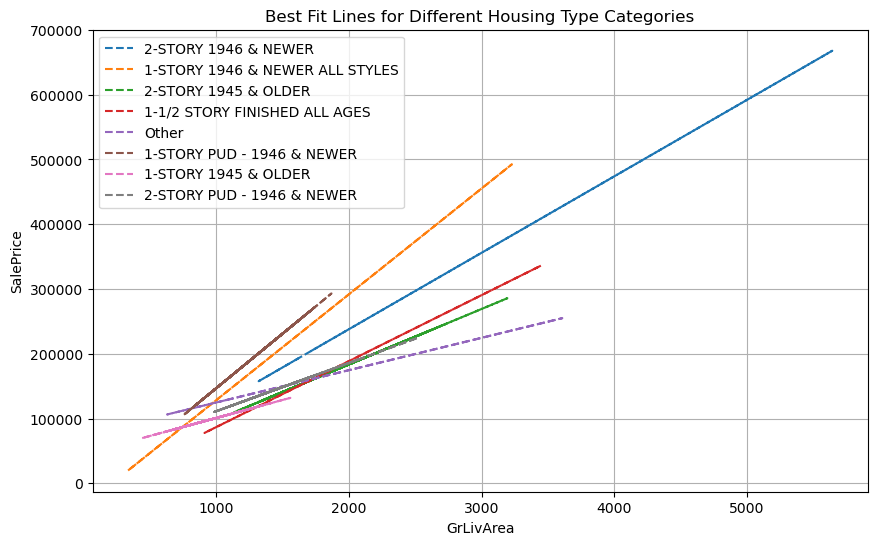

In [33]:
# Create a figure and define the number of rows and columns
fig, ax = plt.subplots(figsize=(10, 6))

# Define the new bins based on MSSubClass_binned
MSSubClass_bins = trained_data['MSSubClass_binned'].unique()

# Loop through each bin in MSSubClass_binned
for bin_label in MSSubClass_bins:
    subset_data = trained_data[trained_data['MSSubClass_binned'] == bin_label]

    # Prepare data for linear regression
    X = subset_data['GrLivArea'].values.reshape(-1, 1)
    y = subset_data['SalePrice']

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    predicted_y_values = model.predict(X)

    # Plot the best-fit line
    plt.plot(X.flatten(), predicted_y_values, label=f'{bin_label}', linestyle='--')
    binned_score = model.score(X, y, sample_weight=None)
    formatted_score = "{:.3f}".format(binned_score)
    print(f"The score for {bin_label} is {formatted_score}.")

plt.title('Best Fit Lines for Different Housing Type Categories')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()